## 기상 데이터 EDA

- 기상청에서 월별로 데이터 수집

- url : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re

plt.rc('font',family='Malgun Gothic')

### data 기본적인 전처리 작업

In [28]:
df = pd.read_csv('weather_data/기상.csv',encoding='cp949')
df

,지점,지점명,일시,평균기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm),평균지면온도(°C)
0,184,제주,2015-01,7.4,1022.0,66,82.4,3.9,94.2,1.8,6.2
1,184,제주,2015-02,7.3,1020.2,64,35.5,3.7,93.5,0.5,7.5
2,184,제주,2015-03,10.4,1019.4,64,80.7,2.9,183.8,0.0,12.4
3,184,제주,2015-04,15.1,1013.5,71,147.9,2.9,163.4,NaN,17.1
4,184,제주,2015-05,18.8,1008.4,68,150.0,2.6,239.7,NaN,23.4
...,...,...,...,...,...,...,...,...,...,...,...
427,189,서귀포,2023-08,28.0,999.5,78,218.9,1.9,250.9,NaN,32.3
428,189,서귀포,2023-09,25.8,1006.4,75,126.4,1.7,217.7,NaN,28.5
429,189,서귀포,2023-10,19.9,1012.5,59,5.9,1.7,252.3,NaN,21.9
430,189,서귀포,2023-11,14.5,1015.5,66,45.2,1.6,198.4,NaN,14.2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  432 non-null    int64  
 1   지점명                 432 non-null    object 
 2   일시                  432 non-null    object 
 3   평균기온(°C)            432 non-null    float64
 4   평균현지기압(hPa)         432 non-null    float64
 5   평균상대습도(%)           432 non-null    int64  
 6   월합강수량(00~24h만)(mm)  432 non-null    float64
 7   평균풍속(m/s)           431 non-null    float64
 8   합계 일조시간(hr)         432 non-null    float64
 9   최심적설(cm)            29 non-null     float64
 10  평균지면온도(°C)          431 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 37.2+ KB


In [30]:
df['지점'] = df['지점'].astype('str') # 지점이 숫자로 되어있어 문자열로 형식을 바꿔줌
df['일시'] = pd.to_datetime(df['일시']) #일시가 문자열 형식으로 되어있어 날짜로 형식 바꿔줌
df['연도']=df['일시'].dt.year #일시에서 연도만 뽑아내어 컬럼을 만듦
df['월']=df['일시'].dt.month #일시에서 월만 뽑아내어 컬럼을 만듦

In [31]:
df['최심적설(cm)']=df['최심적설(cm)'].fillna(0) # 제주도는 겨울 몇 일만 눈이 옴. 하지만 데이터를 모두 지우기보다는 빈값에 0을 채워넣음(True)

In [32]:
df.describe()

,일시,평균기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm),평균지면온도(°C),연도,월
count,432,432.000000,432.000000,432.000000,432.000000,431.000000,432.000000,432.000000,431.000000,432.000000,432.000000
mean,2019-06-16 19:06:40,16.601389,1011.495370,74.245370,145.845602,3.560789,174.603935,0.258796,18.219954,2019.000000,6.500000
min,2015-01-01 00:00:00,4.000000,996.800000,55.000000,2.800000,1.400000,31.400000,0.000000,3.300000,2015.000000,1.000000
25%,2017-03-24 06:00:00,9.875000,1005.750000,67.000000,54.375000,2.300000,142.725000,0.000000,11.050000,2017.000000,3.750000
50%,2019-06-16 00:00:00,16.500000,1011.500000,72.500000,104.250000,3.000000,176.600000,0.000000,18.600000,2019.000000,6.500000
75%,2021-09-08 12:00:00,22.525000,1016.950000,81.000000,205.200000,4.000000,208.725000,0.000000,25.200000,2021.000000,9.250000
max,2023-12-01 00:00:00,29.400000,1024.100000,97.000000,692.400000,10.000000,297.600000,14.400000,33.800000,2023.000000,12.000000
std,NaN,7.081530,6.959977,9.273117,122.805590,1.917743,49.458923,1.399359,8.373925,2.584983,3.456055


In [33]:
df.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '평균현지기압(hPa)', '평균상대습도(%)',
       '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '합계 일조시간(hr)', '최심적설(cm)',
       '평균지면온도(°C)', '연도', '월'],
      dtype='object')

In [34]:
df.groupby(['연도'])[['평균기온(°C)', '평균현지기압(hPa)', '평균상대습도(%)',
       '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '합계 일조시간(hr)', '최심적설(cm)',
       '평균지면온도(°C)']].mean() #연도별 기상 평균치 알아보기 위해 

,평균기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm),평균지면온도(°C)
연도,,,,,,,,
2015,16.189583,1011.364583,74.208333,175.729167,3.566667,171.689583,0.191667,18.075000
2016,16.622917,1011.352083,75.645833,149.372917,3.527083,156.695833,0.250000,18.175000
2017,16.418750,1011.756250,71.895833,101.797917,3.627083,183.141667,0.058333,18.075000
2018,16.285417,1011.485417,75.812500,154.754167,3.551064,173.741667,0.445833,17.862500
2019,16.579167,1011.212500,74.250000,175.191667,3.320833,178.612500,0.000000,18.227083
2020,16.372917,1011.670833,74.479167,142.170833,3.497917,176.150000,0.164583,17.895833
2021,17.154167,1011.408333,74.729167,150.793750,3.666667,184.545833,0.460417,18.429167
2022,16.675000,1011.662500,73.666667,113.535417,3.712500,179.645833,0.235417,18.652083
2023,17.114583,1011.545833,73.520833,149.264583,3.577083,167.212500,0.522917,18.595745


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   지점                  432 non-null    object        
 1   지점명                 432 non-null    object        
 2   일시                  432 non-null    datetime64[ns]
 3   평균기온(°C)            432 non-null    float64       
 4   평균현지기압(hPa)         432 non-null    float64       
 5   평균상대습도(%)           432 non-null    int64         
 6   월합강수량(00~24h만)(mm)  432 non-null    float64       
 7   평균풍속(m/s)           431 non-null    float64       
 8   합계 일조시간(hr)         432 non-null    float64       
 9   최심적설(cm)            432 non-null    float64       
 10  평균지면온도(°C)          431 non-null    float64       
 11  연도                  432 non-null    int32         
 12  월                   432 non-null    int32         
dtypes: datetime64[ns](1), float64(7), int32(2), int64(

In [36]:
df.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '평균현지기압(hPa)', '평균상대습도(%)',
       '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '합계 일조시간(hr)', '최심적설(cm)',
       '평균지면온도(°C)', '연도', '월'],
      dtype='object')

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',family='Malgun Gothic')

In [38]:
df.지점명.unique()

array(['제주', '고산', '성산', '서귀포'], dtype=object)

In [39]:
df.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '평균현지기압(hPa)', '평균상대습도(%)',
       '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '합계 일조시간(hr)', '최심적설(cm)',
       '평균지면온도(°C)', '연도', '월'],
      dtype='object')

### 기상 정보 그래프 그리기

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


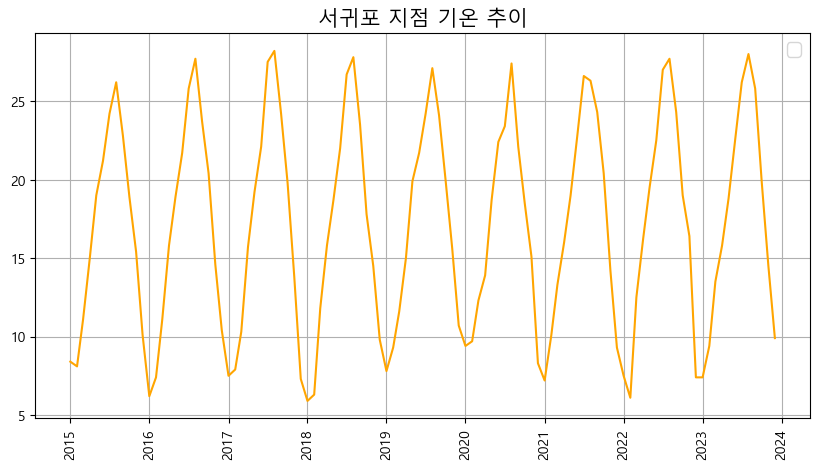

In [40]:
d_ = df[df["지점명"]=='서귀포']
plt.figure(figsize=(10,5))
plt.title("서귀포 지점 기온 추이", fontsize=15)
plt.plot(d_["일시"], d_["평균기온(°C)"], "-", color='orange')
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

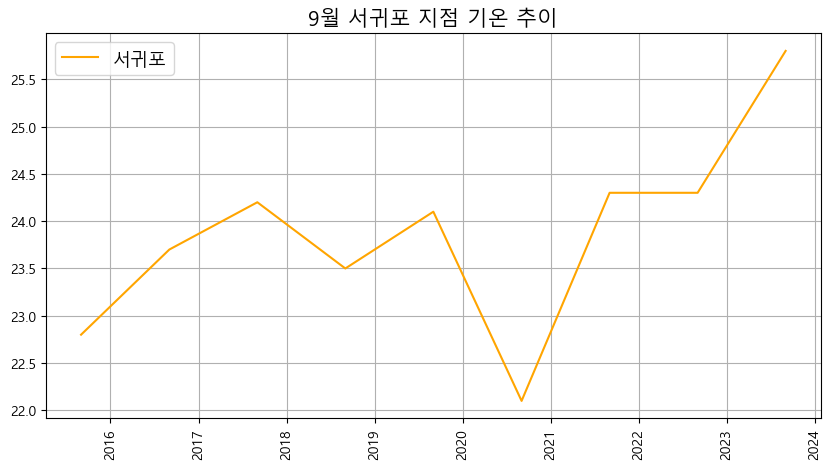

In [41]:
spot_ = '서귀포'
d_ =df[(df["지점명"]==spot_) & ( df["월"]==9)]
plt.figure(figsize=(10,5))
plt.title("9월 %s 지점 기온 추이" % spot_, fontsize=15)
plt.plot(d_["일시"], d_["평균기온(°C)"], "-", color='orange', label=str(spot_))
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

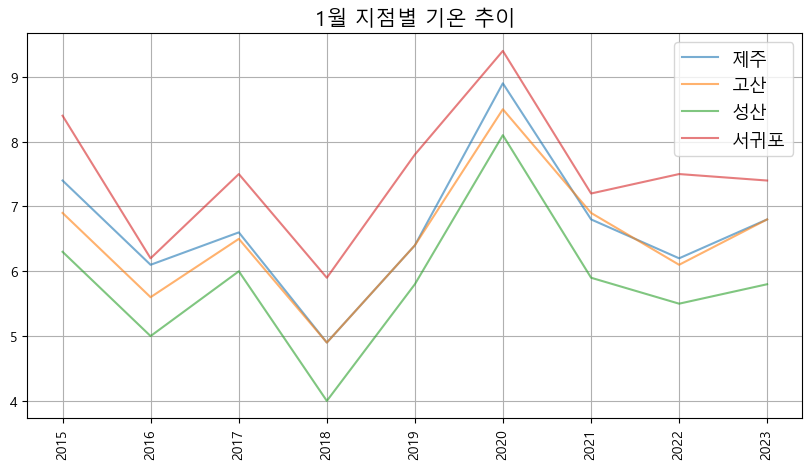

In [42]:
plt.figure(figsize=(10,5))
plt.title("1월 지점별 기온 추이", fontsize=15)
for spot_ in ['제주', '고산', '성산', '서귀포']:
    d_ = df[(df["지점명"]==spot_) & (df["월"]==1)]
    plt.plot(d_["일시"], d_["평균기온(°C)"], "-", label=str(spot_), alpha=.6)
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

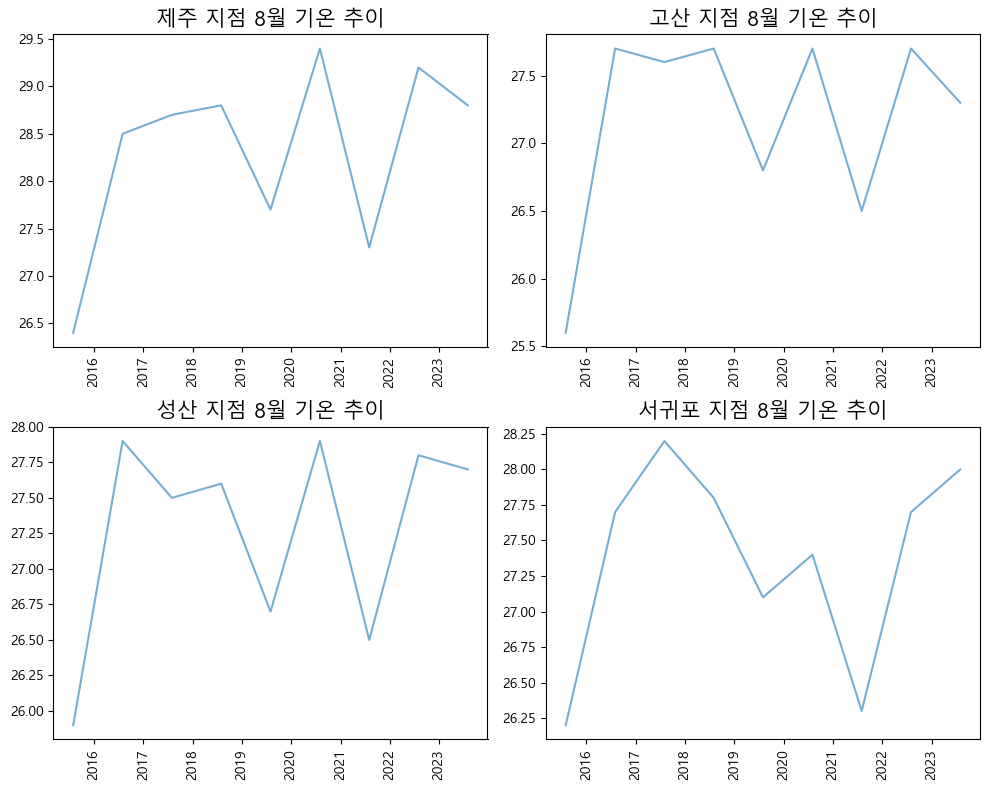

In [48]:
plt.figure(figsize=(10,8)) # 먼저 창을 만들고
n=1
for spot_ in ['제주', '고산', '성산', '서귀포']:
    d_ = df[(df["지점명"]==spot_) & (df["월"]==8)]
    ax = plt.subplot(2,2,n) # for문을 돌면서 Axes를 추가
    plt.title("%s 지점 8월 기온 추이" % spot_, fontsize=15)
    ax.plot(d_["일시"], d_["평균기온(°C)"], "-", label=str(spot_), alpha=.6) # 그래프 추가
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()

In [46]:
heat_ = df[['평균기온(°C)', '평균현지기압(hPa)', '평균상대습도(%)',
       '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '합계 일조시간(hr)', '최심적설(cm)',
       '평균지면온도(°C)',]].dropna().copy()

c:\Python39\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


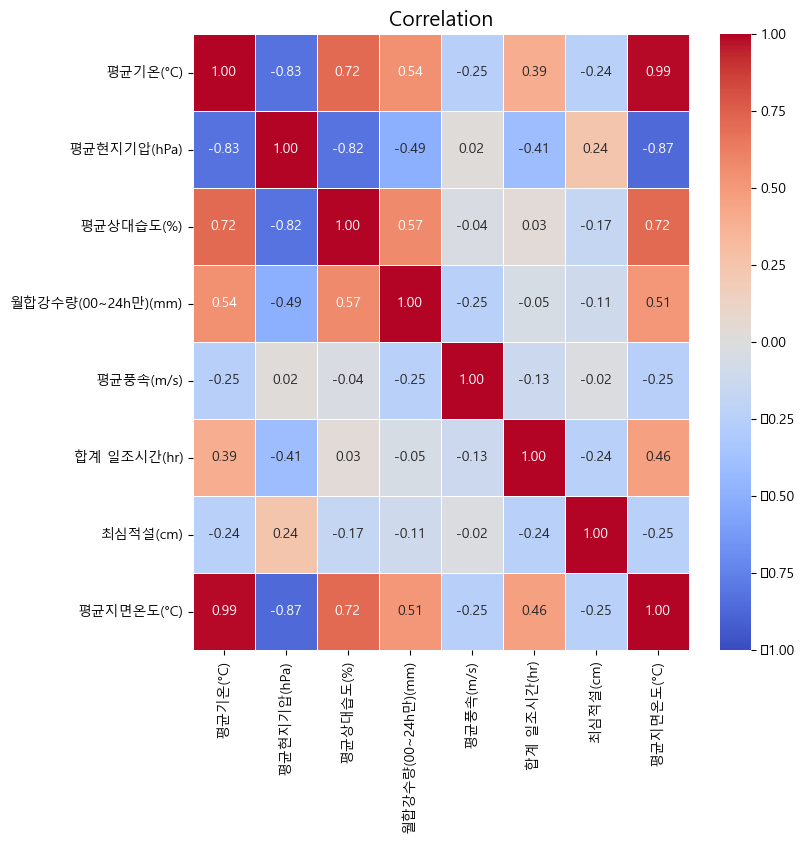

In [47]:
plt.figure(figsize=(8,8)) # 기온별로 상관 관계를 알기 위해서 히트맵 그려봄
plt.title("Correlation", fontsize=15)
sns.heatmap(data = heat_.corr(),
            annot=True,
            fmt = '.2f', linewidths=.5, cmap='coolwarm',
           vmin = -1, vmax = 1, center = 0)
plt.show()

### 기상 지점 지도 표시하기

In [52]:
import folium

In [50]:
df1 = pd.read_excel('weather_data/기상지점정보.xlsx')
df1

,지점,지점명,지점주소,위도,경도
0,184,제주,제주특별자치도 제주시만덕로 6길 32 제주지방기상청,33.5141,126.5297
1,185,고산,제주특별자치도 제주시한경면 노을해안로1013-70 고산레이더관측소,33.2938,126.1628
2,188,성산,제주특별자치도 서귀포시성산읍 신난로11 성산레이더관측소,33.3868,126.8802
3,189,서귀포,제주특별자치도 서귀포시태평로 439번길17 서귀포관측소,33.2462,126.5653


In [54]:
map=folium.Map(location=[df1.위도.mean(), df1.경도.mean()], zoom_start=10) # 지점정보의 위도 경도 평균값으로 지도를 보여줌
map

In [56]:
tiles = "http://mt0.google.com/vt/lyrs=m&hl=ko&x={x}&y={y}&z={z}" #구글지도 타일 설정
attr= "Google" #속성 설정
map = folium.Map(location=[df1['위도'].mean(), df1['경도'].mean()], #folium을 사용하여 지도 초기화
                 tiles=tiles, attr=attr)
for i in df1.index: #df의 각 행을 반복
    folium.Marker(
        location=[df1.loc[i, '위도'], df1.loc[i, '경도']],
        tooltip=df1.loc[i, '지점명'], # 마커에 마우스를 올렸을 때 지점명 표시
        popup=folium.Popup(df1.loc[i, '지점주소'], max_width=200), # 마커를 클릭하면 지점 주소를 알 수 있음
        icon=folium.Icon(color='darkred', icon='sun',prefix='fa') # 아이콘 스타일 설정
    ).add_to(map)
map